### Problem Statement

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The client is facing a problem in identifying the right people for promotion (only for manager position and below) and prepare them in time.The company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, the task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

#### Dataset Description

1. employee_id:	Unique ID for employee
2. department:	Department of employee
3. region:	Region of employment (unordered)
4. education:	Education Level
5. Gender:	Gender of Employee
6. recruitment_channel:	Channel of recruitment for employee
7. no_of_trainings:	no of other trainings completed in previous year on soft skills, technical skills etc.
8. age:	Age of Employee
9. previous_year_rating: Employee Rating for the previous year
10. length_of_service:	Length of service in years
11. KPIs_met>80%: if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
12. awards_won?: if awards won during previous year then 1 else 0
13. avg_training_score:	Average score in current training evaluations
14. is_promoted: (Target) Recommended for promotion

### Import Libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [4]:
train = pd.read_csv('/content/drive/MyDrive/cap1/train.csv')
test = pd.read_csv('/content/drive/MyDrive/cap1/test.csv')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Data exploration

In [7]:
# getting their shapes

print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [8]:
train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [9]:
# checking if there is any NULL value in the dataset

train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [10]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


There is a combination of datatypes present in the data: int, float and object

Categorical features: .

Continous: employee_id,age,avg_training_score.

The target/dependent feature in our dataset is is_promoted , rest 13 fetaures are independent features

#### There are 14 features, looking into each of these features:

1. **Employee_id**: Each employee is provided a unique ID. Lets see how many unique employees we have in our dataset            

In [13]:
train.employee_id.value_counts()

65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: employee_id, Length: 54808, dtype: int64

In [14]:
train.employee_id.nunique()

54808

There are 54808 unique employees in our dataset and none of the value in this feature is null.

The feature has no impact on the outcome variable. So, it will be excluded from analysis.

2. **Department**: The various departments in which employees are there in the company.

In [15]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

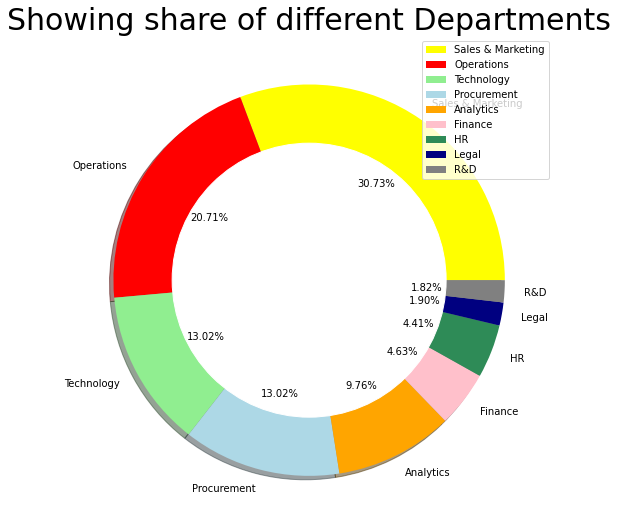

In [16]:
# plotting a donut chart for visualizing each of the department share

size = [16840, 11348, 7138,7138,5352,2536,2418,1039,999]
colors = ['yellow', 'red', 'lightgreen','lightblue','orange','pink','seagreen','navy','grey']
labels = "Sales & Marketing", "Operations", "Technology","Procurement","Analytics","Finance","HR","Legal","R&D"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Departments', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

It is categorical variable with 9 different categories. Sales & Marketing has the highest number of employees constituting 31% of the total employee strength.

3. **Region**: Region of employment contains various regions were the employees are working. These regions are present in unordered format.

In [17]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

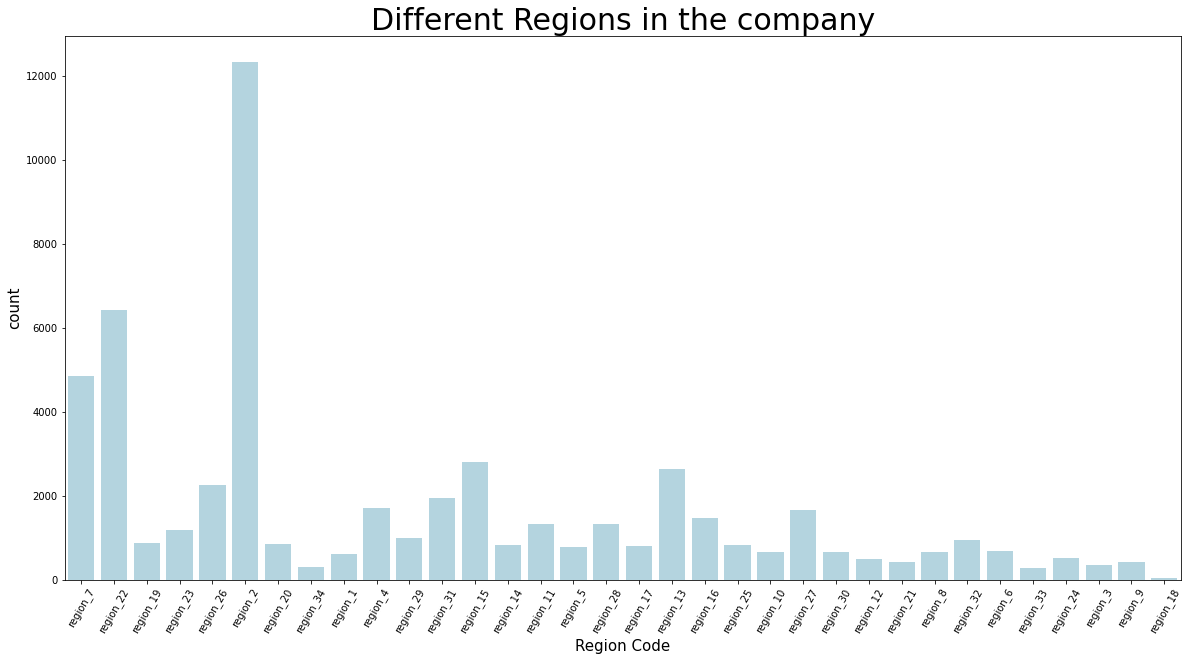

In [18]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['region'], color = 'lightblue')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

4. **Education**: education level of the employee.

In [19]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

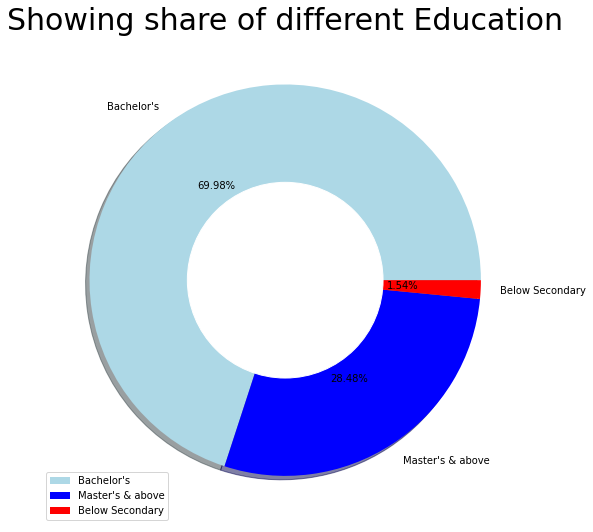

In [20]:
# plotting a donut chart for visualizing each of the education share

size = [36669, 14925, 805]
colors = ['lightblue','blue','red']
labels = "Bachelor's", "Master's & above", "Below Secondary" 

my_circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Education', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

It is categorical variable with 3 different categories: Below Secondary,Bachelor's & Master's & above. 70% of the employees have Bachelor's degree.

5. **Gender**: gender is a categorical variables with 2 categories: Male and Female.

In [21]:
train.gender.value_counts()   

m    38496
f    16312
Name: gender, dtype: int64

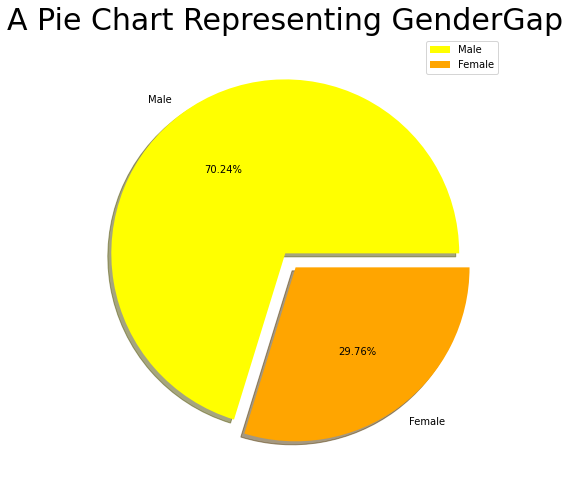

In [22]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

There are twice as many male employees in the company as compared to the female employees.

6. **recruitment_channel**: Channel of recruitment for employee contains 3 categories: sourcing, referred and other.

In [23]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

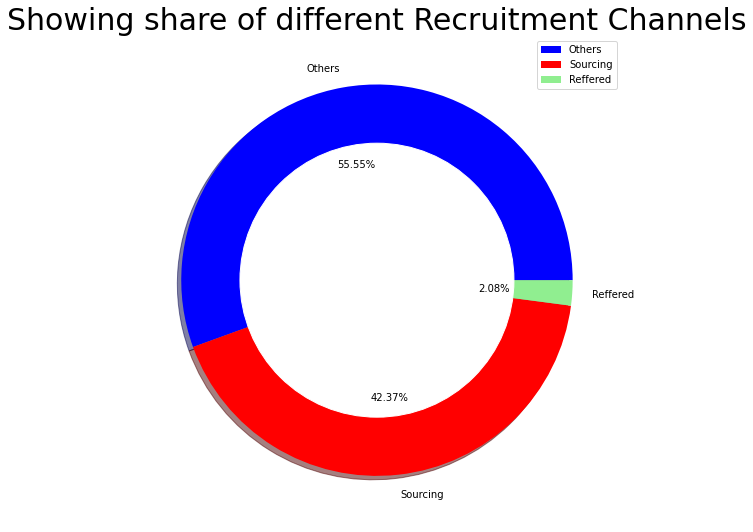

In [24]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['blue', 'red', 'lightgreen']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

7. **no_of_trainings**: no of other trainings the employee has completed in previous year on soft skills, technical skills etc.

In [25]:
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

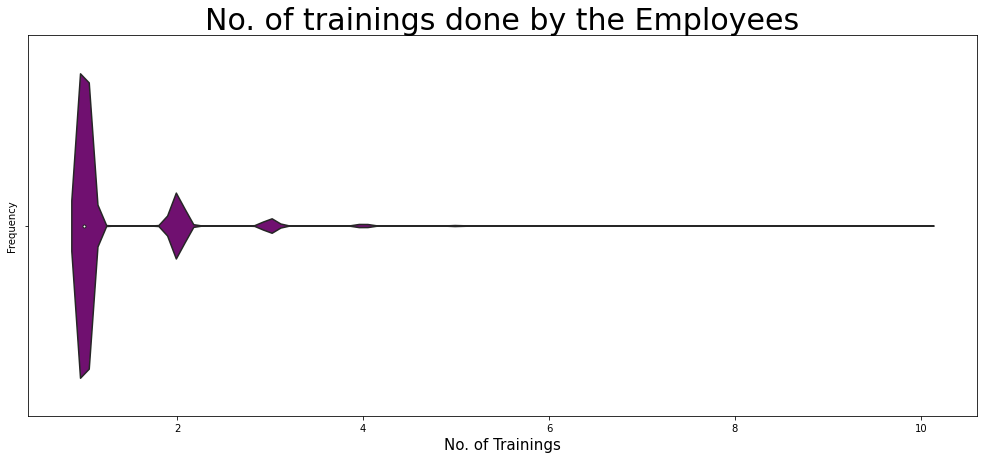

In [26]:
# checking the different no. of training done by the employees

plt.rcParams['figure.figsize'] = (17, 7)
sns.violinplot(train['no_of_trainings'], color = 'purple')
plt.title('No. of trainings done by the Employees', fontsize = 30)
plt.xlabel('No. of Trainings', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

Each employee has undergone atleast a training in the previous year.The no of trainings undergone varies from 1 to 10. 

8. **Age**: Age of the employee.

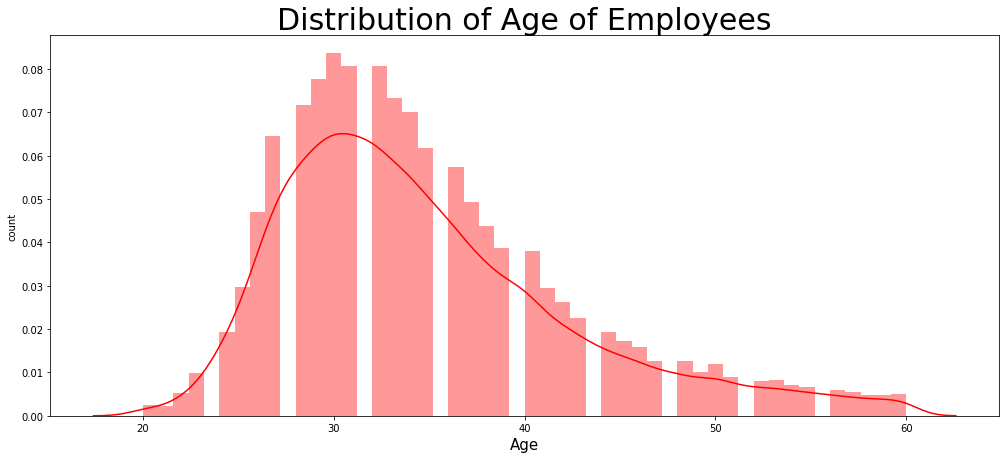

In [27]:
# checking the distribution of age of Employees in the company

sns.distplot(train['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

In [28]:
print("Age varies from: ",train.age.min(),'yrs to',train.age.max(),'yrs')

Age varies from:  20 yrs to 60 yrs


9. **Previous_year_rating**: Employee Rating for the previous year. It is a categorical variable as there are rated on a scale of 1 to 5.

In [29]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

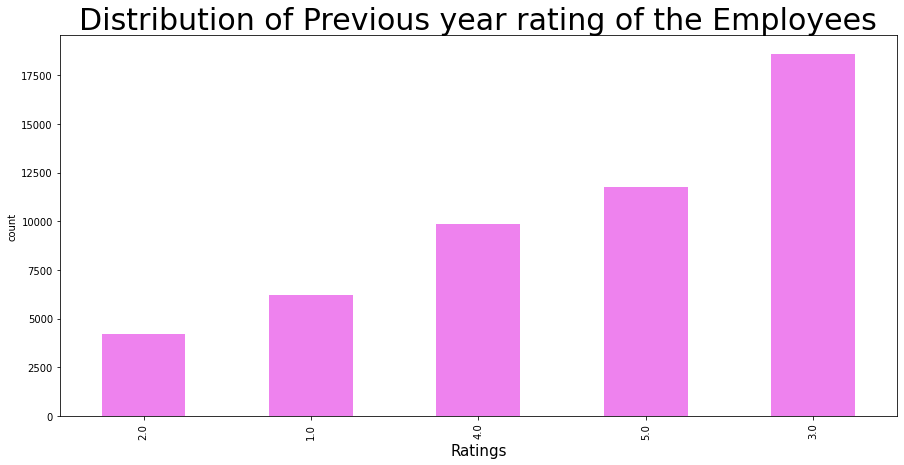

In [30]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

10. **length_of_service** : For how many years the employee has been working.

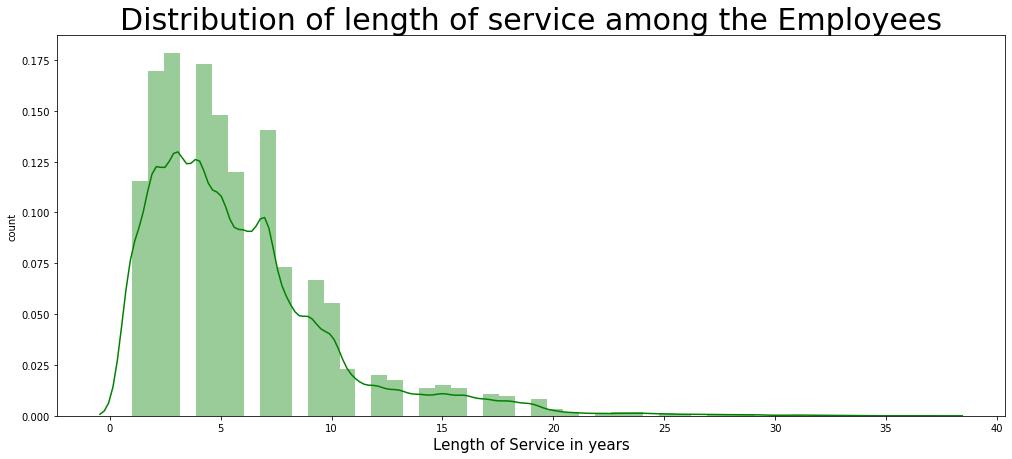

In [31]:
# checking the distribution of length of service

sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

In [32]:
print("The years of employment varies from: ",train.length_of_service.min(),'yrs to',train.length_of_service.max(),'yrs')

The years of employment varies from:  1 yrs to 37 yrs


11. **KPIs_met >80%** : It is a categorical variable with 2 categories where 1 indicates those employees whose Key Performance Indicators was greater than 80% and 0 represents the rest.

In [33]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

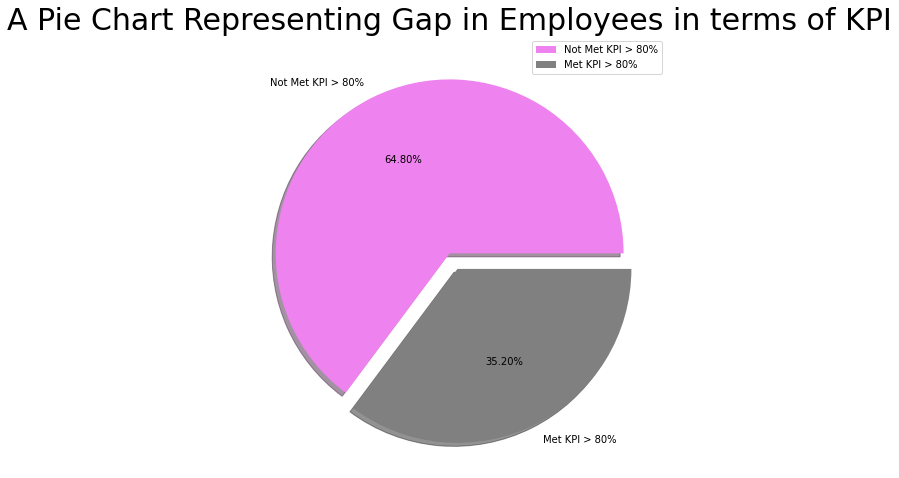

In [34]:
# plotting a pie chart


size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

12. **awards_won**: It is a categorical variable with 2 categories where 1 indicates a employee who has won an award and 0 represnts the rest.

In [35]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

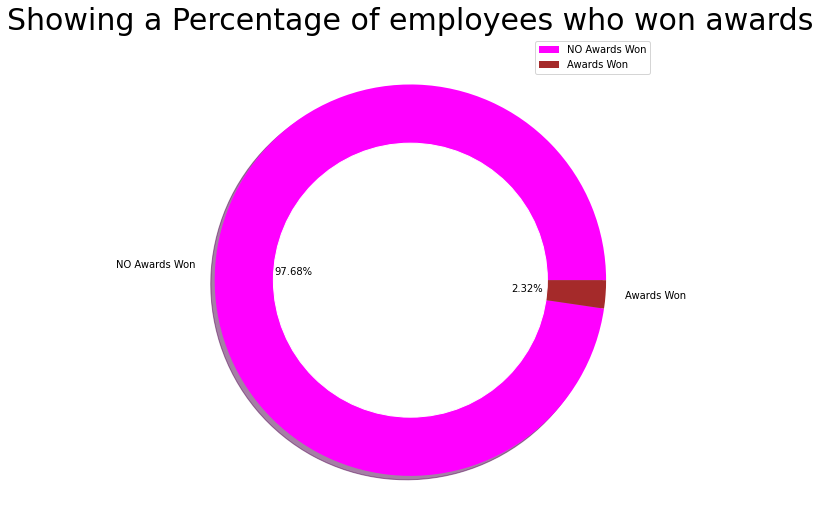

In [36]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538, 1270]
colors = ['magenta', 'brown']
labels = "NO Awards Won", "Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Only 2.3% of the employees have won an award.

13. **avg_training_score**: Average score in current training evaluations.

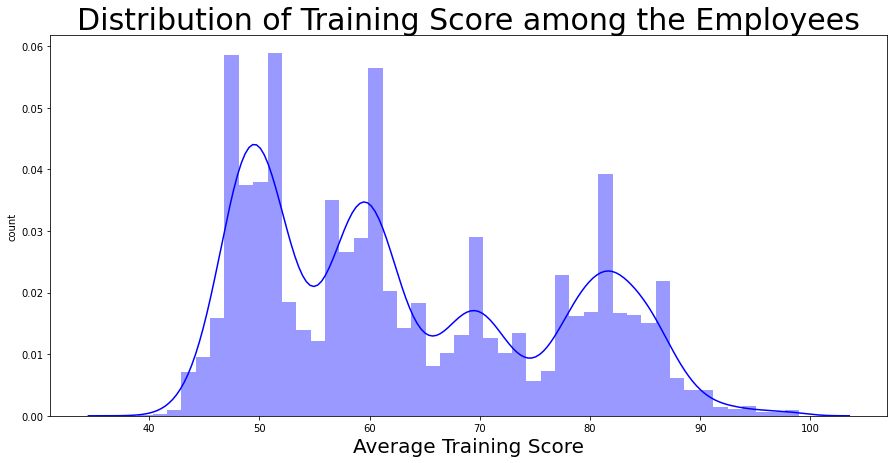

In [37]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [38]:
print("Average score ranges between: ",train.avg_training_score.min(),'to',train.avg_training_score.max())

Average score ranges between:  39 to 99


14. **is_promoted** : This the target variable which helps in recommending if the employee is promoted with the help of all the above parameters.

It is a categorical variable with 2 values making this is binary classification problem 

In [39]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

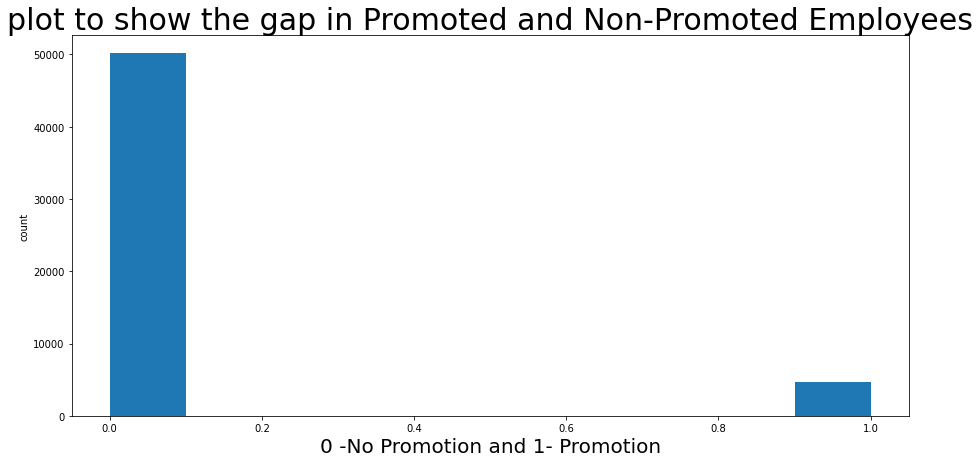

In [40]:
#plotting a scatter plot 

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

In [41]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


Only 8.5% of the employees where promoted make it an **imbalanced** dataset.

### EDA

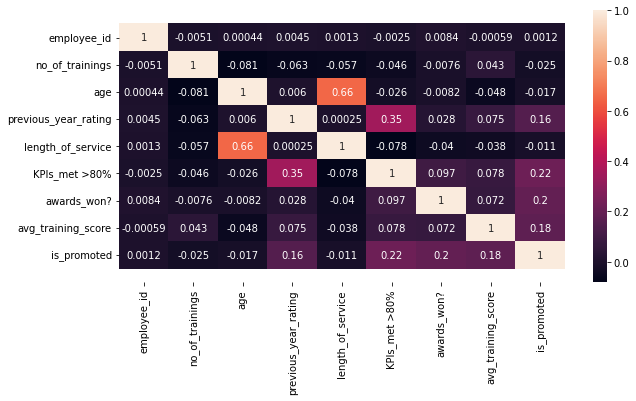

In [42]:
# Correlation matrix between numerical values

plt.figure(figsize=(10, 5))
cor = train.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable is not significantly correlated with other variables.

The age variable is highly correlated with the length of service.

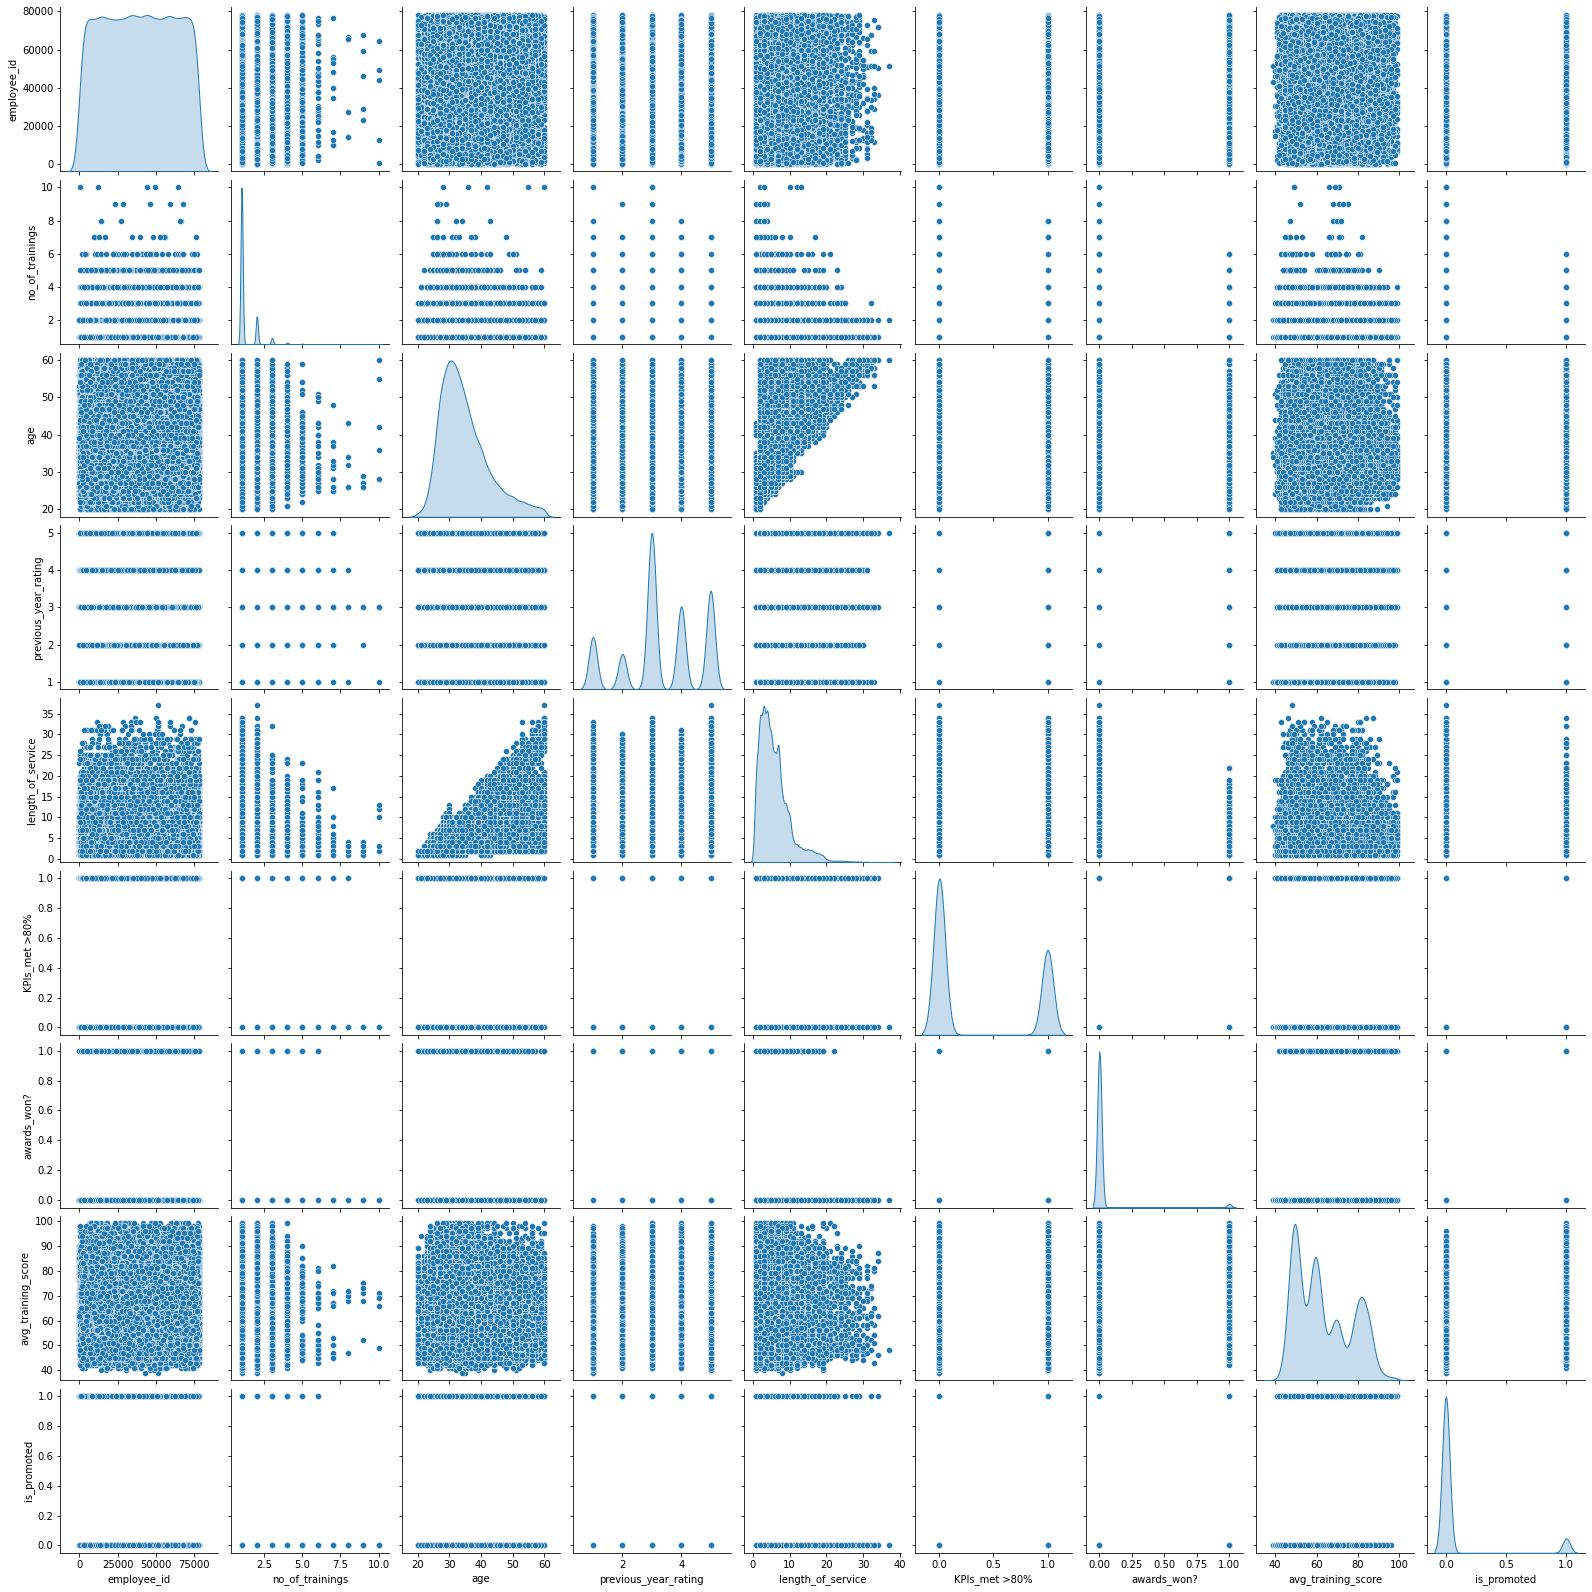

In [43]:
sns.pairplot(train,diag_kind='kde')
plt.show()

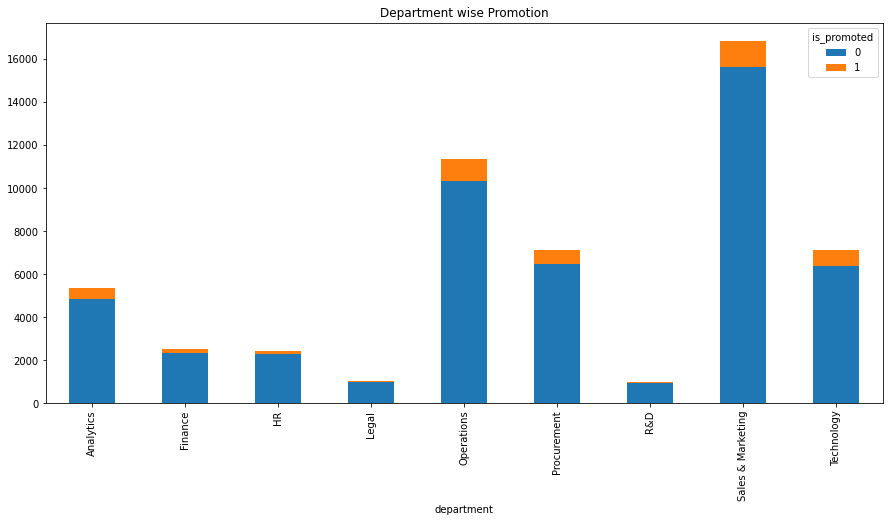

In [44]:
pd.crosstab(train['department'], train['is_promoted']).plot(kind='bar', stacked=True);
plt.title('Department wise Promotion')
plt.show()

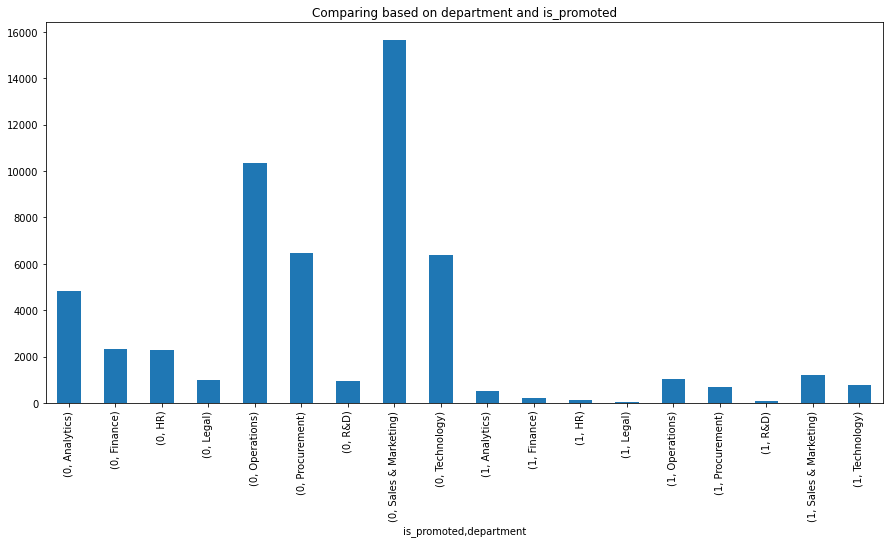

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64


In [45]:
#A bar plot of is_promoted by Department

train.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

#percentages of employess from each department who are promoted
d = train[train['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

The highest number of employees in the company were from Sales and Marketing and the highest %age of promoted employees are also from the same department.

After sales we can see that a significant number of employees have been promoted from Operations.

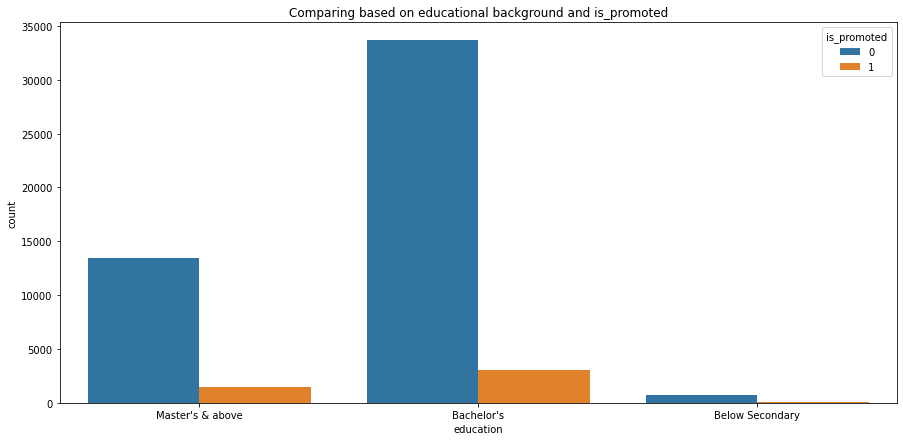

Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: education, dtype: float64

In [46]:
# Employees with which educational background have been promoted the most?

sns.countplot(x = 'education', hue = 'is_promoted', data = train)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

#print percentages of  Below Secondary,Bachelor's & Master's & above who are promoted
train[train['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

The highest number of employees in the company had completed Bachelor's education and the highest %age of promoted employees are also from the same educational background i.e 66%.

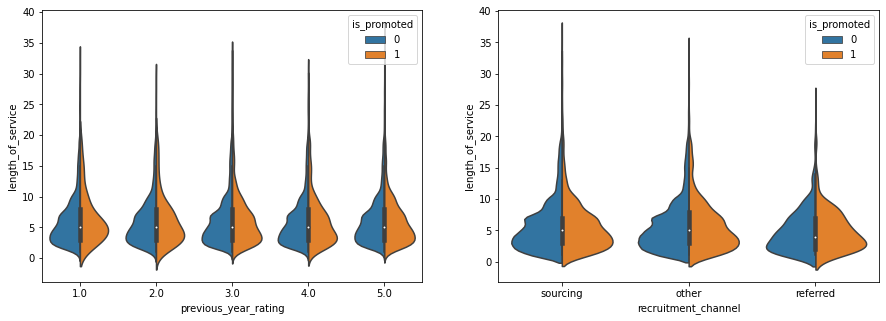

In [47]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# violinplot plot
sns.violinplot(x = 'previous_year_rating', y = 'length_of_service', data = train, hue = 'is_promoted', split = True, ax = axes[0])
sns.violinplot(x = 'recruitment_channel', y = 'length_of_service', data = train, hue = 'is_promoted', split = True, ax = axes[1])
plt.show()

On an average based on previous year of rating and recuritment channel the employees who have been promoted had the length of service between 3 to 5 yrs.

This may be because the promotions were only for manager position and below.

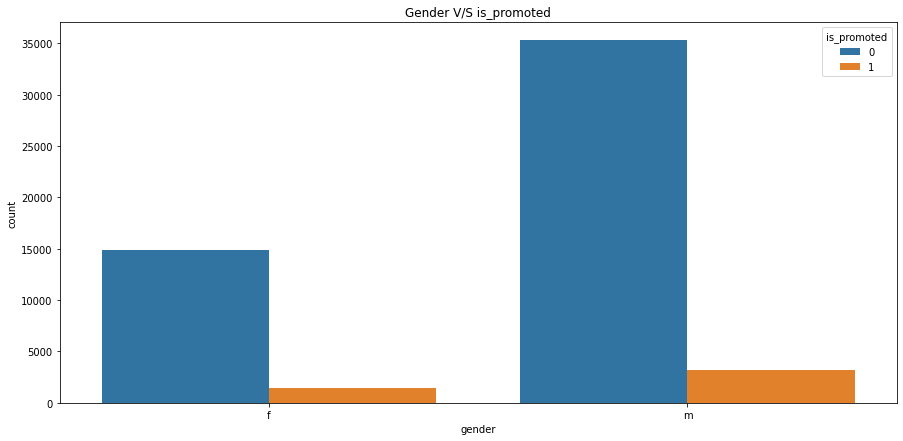

m    68.573265
f    31.426735
Name: gender, dtype: float64

In [48]:
# Gender V/S is_promoted

sns.countplot(x = 'gender', hue = 'is_promoted', data = train)
plt.title('Gender V/S is_promoted')
plt.show()

#percentages of females vs. males who are promoted
train[train['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

68.5% of the males are promoted.

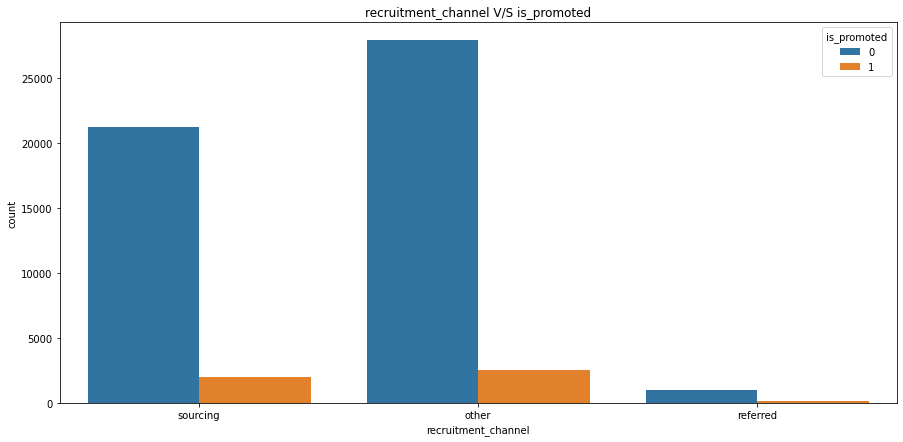

other       54.755784
sourcing    42.287918
referred     2.956298
Name: recruitment_channel, dtype: float64

In [49]:
# recruitment_channel V/S is_promoted

sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = train)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

train[train['is_promoted'] == 1]['recruitment_channel'].value_counts(normalize = True) * 100

The employees who have been recruited from other channels are the one who have been promoted the most.

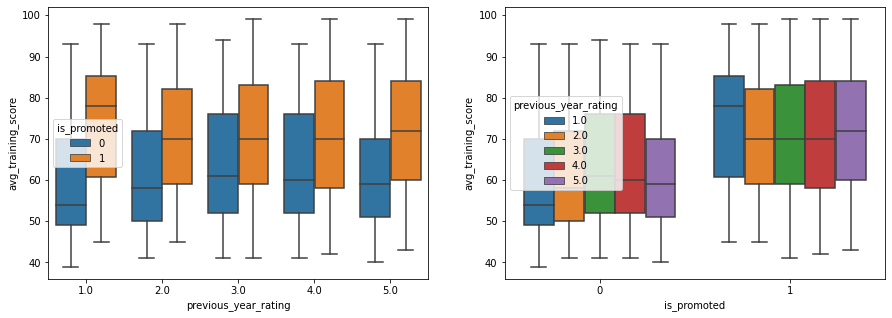

In [50]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# boxplot
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=train,hue='is_promoted', ax = axes[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=train,hue='previous_year_rating', ax = axes[1])
plt.show()

From these boxplots we can clearly see that average training score has a significant impact on the promotion.

In each of the groups based on previous year rating the employee who has scored more in the training test has been promoted.

The employees who had the lowest previous have worked hard and scored greater score in the training and are the ones who have been promoted the most i.e the employees whose performance has increased from the previous year have been giving equal opportunities in promotion.

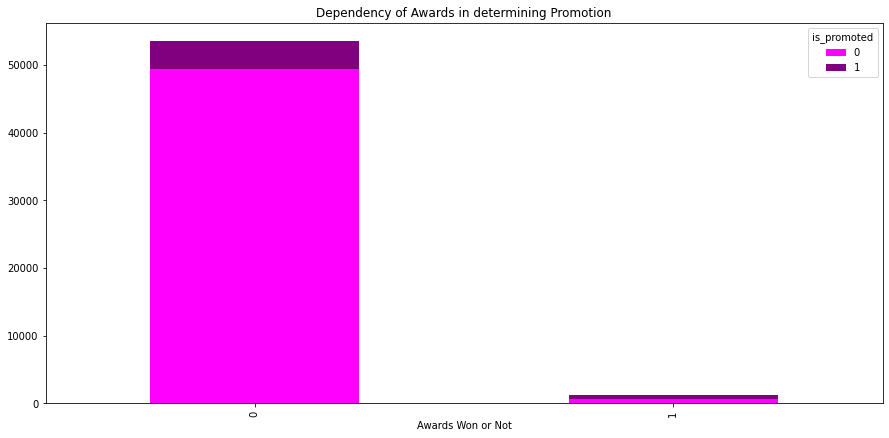

0    88.02485
1    11.97515
Name: awards_won?, dtype: float64

In [51]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

train[train['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

**There is a very good chance of getting promoted if the employee has won an award**

The people who have not won awards in the previous year are more in number and strangely 88% of these people have been promoted.

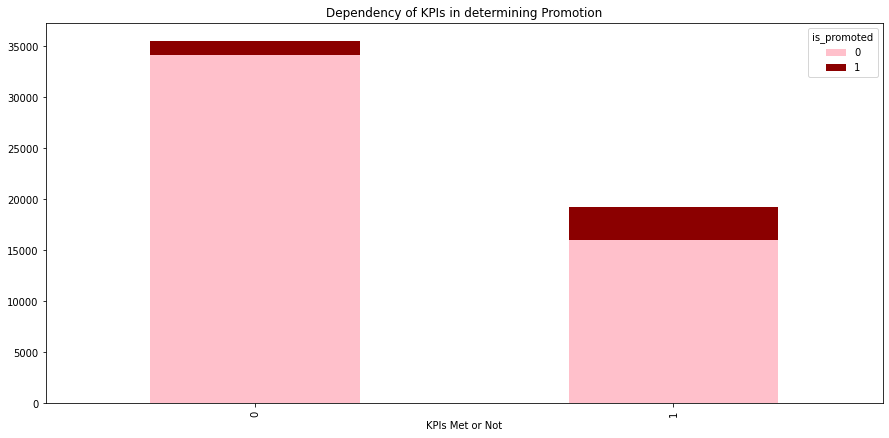

1    69.880034
0    30.119966
Name: KPIs_met >80%, dtype: float64


In [52]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

print(train[train['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

**Again Having a good KPI score increases the chances of getting promoted in the company.**

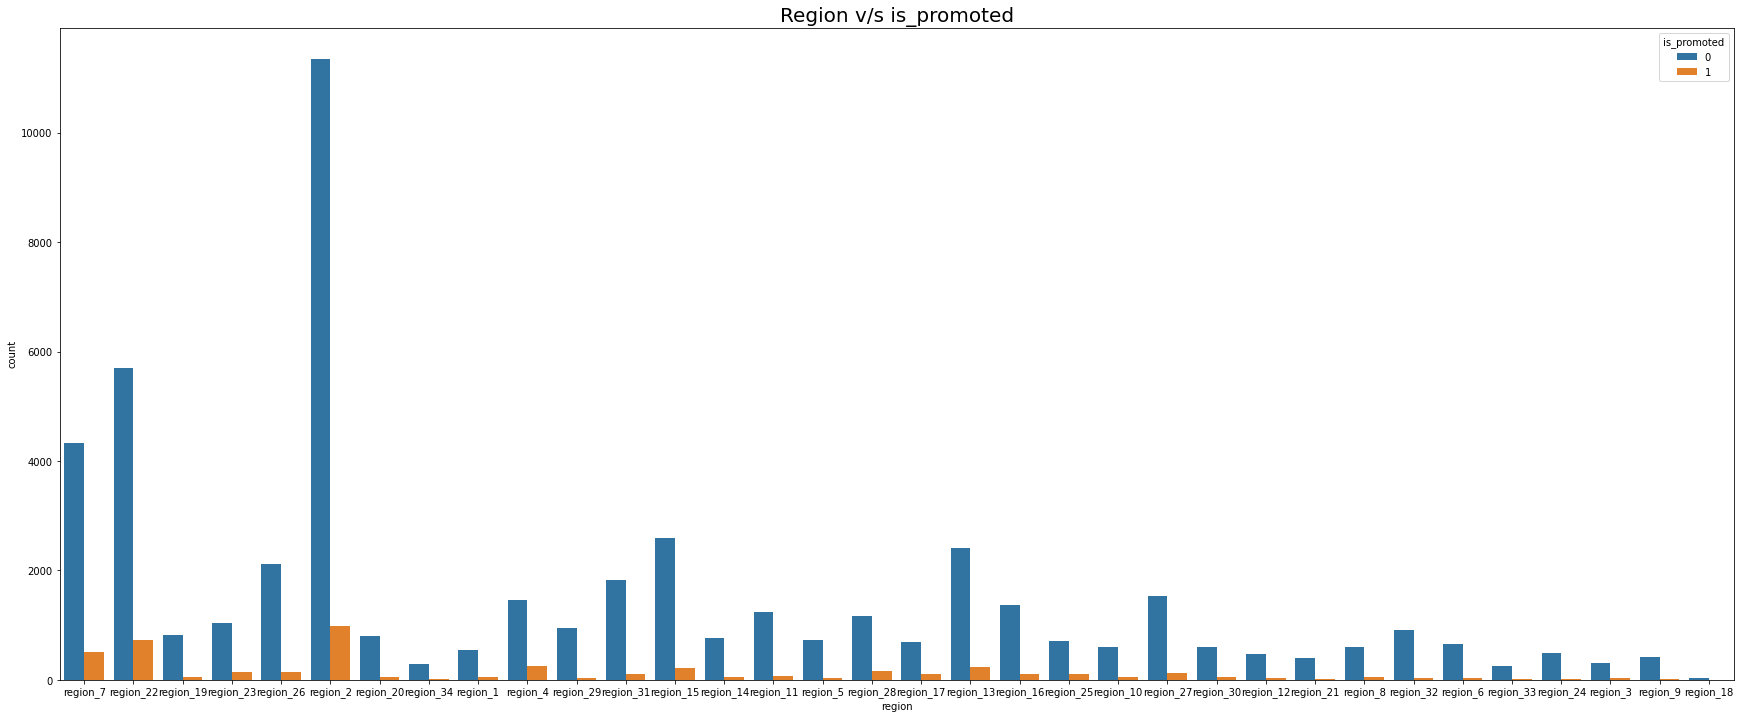

In [53]:
#Region and is_promoted

plt.figure(figsize=(30,12))
sns.countplot(x='region',data=train,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

Employees from region 2 and 22 have been promoted the most.

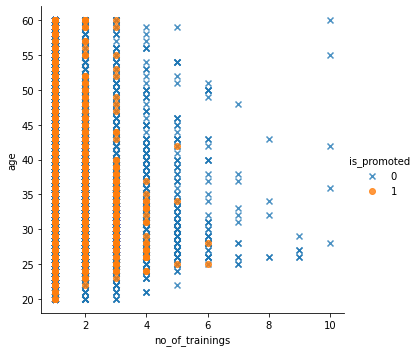

In [54]:
sns.lmplot(x='no_of_trainings',y='age',data=train,fit_reg=False,hue='is_promoted',markers=['x','o'])
plt.show()

The no of trainings and the employees promoted are inversely proportional.

Almost all the employees of various age groups have done around 3 trainings.

### Data preprocessing

In [55]:
# combining the data for data prep

test['is_promoted']=np.nan
train['data']='train'
test['data']='test'
test=test[train.columns]

combined = pd.concat([train,test], sort = False , ignore_index= True)

In [56]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [57]:
#Missing values

combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [58]:
combined.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [59]:
#filling in education with the maximum value(mode)

combined.education.fillna("Bachelor's",inplace=True)

In [60]:
combined.education.value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [61]:
combined.education.isna().sum()

0

In [62]:
combined.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [63]:
#filling in previous_year_rating with the median

combined.previous_year_rating.fillna(combined.previous_year_rating.median(),inplace=True)

In [64]:
combined.previous_year_rating.value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [65]:
combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [66]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  data                  78298 non-null  object 
dtypes: float64(2), int6

In [67]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


### Encoding the data

#### Feature Hashing:
Feature hashing maps each category in a categorical feature to an integer within a pre-determined range. This output range is smaller than the input range so multiple categories may be mapped to the same integer. Feature hashing is very similar to one-hot encoding but with a control over the output dimensions.

To implement feature hashing in python we can use category_encoder, a library containing sklearn compabitable category encoders.

In [68]:
#Feature hashing region

unique_region = np.unique(combined[['region']])
print("Total unique regions:", len(unique_region))
print(unique_region)

Total unique regions: 34
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


In [69]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(combined['region'])
hashed_features = hashed_features.toarray()
hashed_features = pd.DataFrame(hashed_features)
print(hashed_features)
combined = pd.concat((combined, hashed_features),axis=1)

         0    1    2    3    4    5
0     -1.0  3.0  0.0  0.0  0.0  0.0
1     -1.0  3.0 -1.0  2.0  0.0  0.0
2     -1.0  2.0 -1.0  0.0  0.0  1.0
3      0.0  3.0 -1.0  1.0  0.0  0.0
4     -1.0  3.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
78293 -1.0  3.0 -1.0  1.0  0.0  0.0
78294  0.0  3.0 -1.0  1.0  0.0  0.0
78295 -1.0  2.0  0.0  0.0  0.0  0.0
78296  0.0  2.0 -1.0  0.0  0.0  0.0
78297 -1.0  2.0  0.0  0.0  0.0  0.0

[78298 rows x 6 columns]


In [70]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [71]:
combined.drop('region',axis=1,inplace=True)

In [72]:
#encoding gender and education

combined['gender'] = combined['gender'].map( {'f': 0, 'm': 1} ).astype(int)  

combined['education'] = combined['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)


In [73]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,2,0,sourcing,1,35,5.0,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,1,1,other,1,30,5.0,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,1,1,sourcing,1,34,3.0,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,1,1,other,2,39,1.0,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,1,1,other,1,45,3.0,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [74]:
#Frequency Encoding

# size of each category
encoding = combined.groupby('department').size()

# get frequency of each category
encoding = encoding/len(combined)

combined['department'] = combined.department.map(encoding)

In [75]:
#Frequency Encoding

# size of each category
encoding = combined.groupby('recruitment_channel').size()

# get frequency of each category
encoding = encoding/len(combined)

combined['recruitment_channel'] = combined.recruitment_channel.map(encoding)

In [76]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5.0,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5.0,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3.0,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,0.308501,1,1,0.555876,2,39,1.0,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3.0,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [77]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  float64
 2   education             78298 non-null  int64  
 3   gender                78298 non-null  int64  
 4   recruitment_channel   78298 non-null  float64
 5   no_of_trainings       78298 non-null  int64  
 6   age                   78298 non-null  int64  
 7   previous_year_rating  78298 non-null  float64
 8   length_of_service     78298 non-null  int64  
 9   KPIs_met >80%         78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  is_promoted           54808 non-null  float64
 13  data                  78298 non-null  object 
 14  0                     78298 non-null  float64
 15  1                  

In [78]:
combined['previous_year_rating'] = combined['previous_year_rating'].astype(int)

In [79]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,0.308501,1,1,0.555876,2,39,1,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [80]:
#splitting the data back into train and test as it was already provided

train = combined[combined['data']=='train']
train.drop(['data','employee_id'],axis=1,inplace=True)

test = combined[combined['data']=='test']
submit = test['employee_id']
test.drop(['is_promoted','data','employee_id'],axis=1,inplace=True)

del combined

In [81]:
print(train.shape)
print(test.shape)

(54808, 18)
(23490, 17)


In [82]:
#For submission

submission = pd.DataFrame()
submission['employee_id'] = submit
submission['is_promoted'] = np.nan

In [83]:
submission

,employee_id,is_promoted
54808,8724,NaN
54809,74430,NaN
54810,72255,NaN
54811,38562,NaN
54812,64486,NaN
...,...,...
78293,53478,NaN
78294,25600,NaN
78295,45409,NaN
78296,1186,NaN


In [84]:
train["is_promoted"] = train["is_promoted"].astype(int)

y = train["is_promoted"]
X = train.drop(labels = ["is_promoted"],axis = 1)

### Data imbalance treatment

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.One way to solve this problem is to oversample the examples in the minority class.

SMOTE(Synthetic Minority Oversampling TEchnique) works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [85]:
#Oversampling of the Model

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

from imblearn.over_sampling import SMOTE
#oversample = SMOTE()

x_sample, y_sample = SMOTE().fit_resample(X, y.values.ravel())

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_sample == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_sample == 0))) 

X = pd.DataFrame(x_sample,columns=X.columns)
y = pd.DataFrame(y_sample)

Before OverSampling, counts of label '1': 4668
Before OverSampling, counts of label '0': 50140 

Size of x-sample : (100280, 17)
Size of y-sample : (100280,)

After OverSampling, counts of label '1': 50140
After OverSampling, counts of label '0': 50140


In [86]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (70196, 17)
Shape of x_valid:  (30084, 17)
Shape of y_train:  (70196, 1)
Shape of y_valid:  (30084, 1)


In [87]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
#test = sc.transform(test)

In [88]:
X_test.shape

(30084, 17)

### Model building

#### Logistic Regression

In [89]:
import matplotlib.pyplot as plt 

In [90]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve = '+str(roc_auc_score(y_test,y_test_prob)))#y_test_prob   y_test_pred
    plt.legend()
    plt.show()

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , accuracy_score,precision_score,recall_score, roc_auc_score,roc_curve,classification_report,f1_score
from sklearn.model_selection import train_test_split

In [92]:
#Logistic Regression

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)

#print('Accuracy : %.3f' % accuracy_score(y_test,y_test_pred))

y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]

#print(accuracy_score(y_train,y_train_pred))
#print(roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

#
#print(accuracy_score(y_test,y_test_pred))
#print(roc_auc_score(y_test,y_test_prob))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     14941
           1       0.73      0.74      0.73     15143

    accuracy                           0.73     30084
   macro avg       0.73      0.73      0.73     30084
weighted avg       0.73      0.73      0.73     30084



Accuracy = 0.7289256747772902
Precision = 0.7253611971104231
Recall = 0.7426533711946114
F1 score = 0.733905439357849


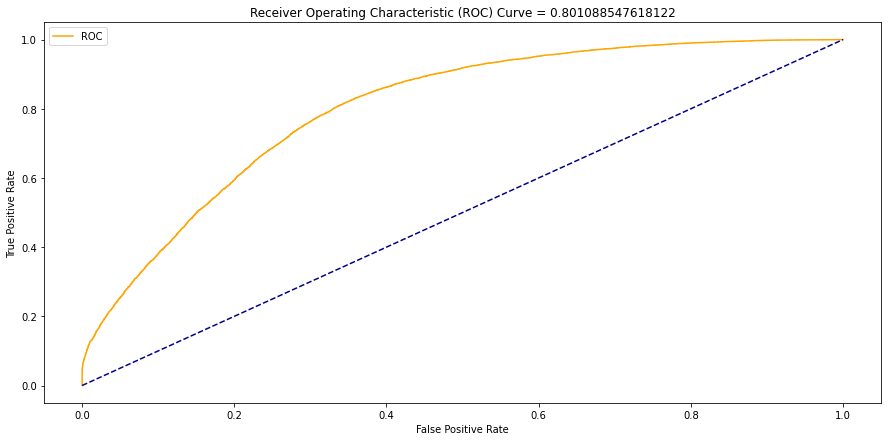

In [93]:
probs = lr.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)

tmp1= pd.Series({'Model': " logistic regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                 })

model_lr1_report = models_report.append(tmp1, ignore_index = True)

print('Accuracy =' ,accuracy_score(y_test,y_test_pred))
print('Precision =' ,precision_score(y_test, y_test_pred, average='binary'))
print('Recall =' ,recall_score(y_test, y_test_pred, average='binary'))
print('F1 score =' ,f1_score(y_test, y_test_pred, zero_division=1)) 

plot_roc_cur(fper, tper)

#### Decision Tree

Hyperparameter Tuning

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2e29a950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2e29afd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2e29af10>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [95]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 11}

In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9002364807111516
0.9733688675192466
0.8906395426140141
0.9660690833057726


In [97]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.290075
department,0.288549
recruitment_channel,0.111751
KPIs_met >80%,0.100923
3,0.053942
1,0.053751
previous_year_rating,0.043783
0,0.023389
age,0.008607
length_of_service,0.005955


In [98]:
# Feature selection (Dropping insignificant features)

X_new = X[['department','recruitment_channel','no_of_trainings', 'age','previous_year_rating',
           'length_of_service','KPIs_met >80%','avg_training_score',0,1,2,3]]
y_new = y

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new,y_new)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2d7d59d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2d7d5e90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2d7d5090>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [100]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 11, 'min_samples_split': 7}

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.8999230725397459
0.9729717938477906
0.8908057439170323
0.9672816610765698


In [102]:
test_new = test[['department','recruitment_channel','no_of_trainings', 'age','previous_year_rating',
                 'length_of_service','KPIs_met >80%','avg_training_score',0,1,2,3]]

In [103]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X_new.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
department,0.293783
avg_training_score,0.289619
recruitment_channel,0.112087
KPIs_met >80%,0.101035
1,0.055022
3,0.052797
previous_year_rating,0.044120
0,0.023873
age,0.010468
length_of_service,0.006814


In [104]:
# Feature selection (Dropping insignificant features)

X_new2 = X[['department','recruitment_channel', 'age','previous_year_rating','KPIs_met >80%','avg_training_score',0,1,3]]
y_new2 = y

In [105]:
#Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new2,y_new2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2d7c6a50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2d7c60d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f2d7c6650>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [106]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 11}

In [107]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_new2,y_new2,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9054219613653199
0.9738881957290666
0.8977861986437974
0.9682497154309352


Accuracy = 0.8977861986437974
Precision = 0.9545523405544615
Recall = 0.83584267427207
F1 score = 0.8912620672583896


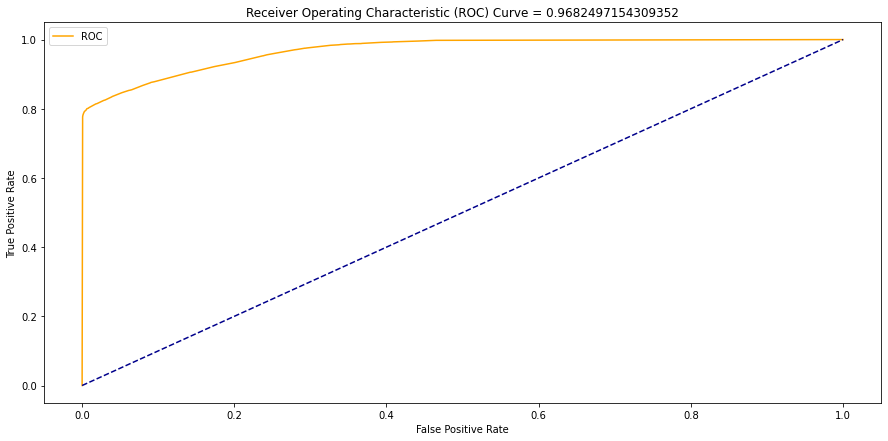

In [108]:
probs = dt.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)

tmp2= pd.Series({'Model': " Decision Tree ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                 })

model_dt1_report = models_report.append(tmp2, ignore_index = True)


print('Accuracy =' ,accuracy_score(y_test,y_test_pred))
print('Precision =' ,precision_score(y_test, y_test_pred, average='binary'))
print('Recall =' ,recall_score(y_test, y_test_pred, average='binary'))
print('F1 score =' ,f1_score(y_test, y_test_pred, zero_division=1)) 

plot_roc_cur(fper, tper)

In [109]:
test_new2 = test[['department','recruitment_channel', 'age','previous_year_rating','KPIs_met >80%','avg_training_score',0,1,3]]

In [110]:
### RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

rf_y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,rf_y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.991537979372044
0.9996862854777441
0.9520675442095466
0.9870001083131867


Accuracy = 0.8977861986437974
Precision = 0.9545523405544615
Recall = 0.83584267427207
F1 score = 0.8912620672583896


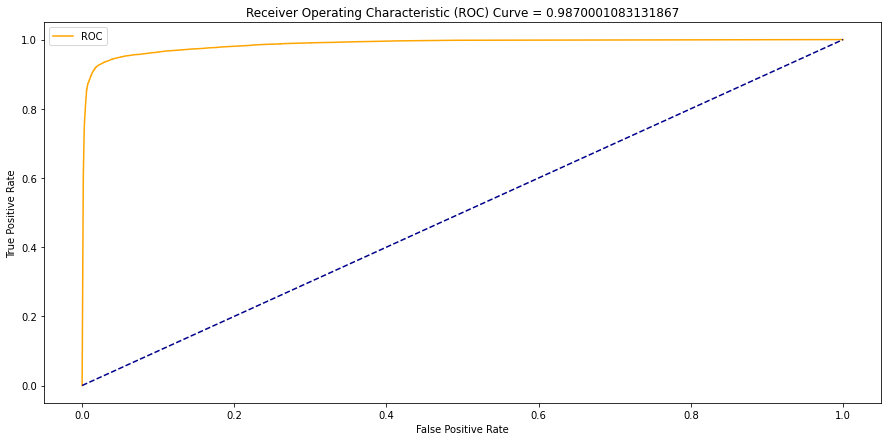

In [111]:
probs = rf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)

tmp3= pd.Series({'Model': " Random Forest ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                 })

model_rf1_report = models_report.append(tmp3, ignore_index = True)

print('Accuracy =' ,accuracy_score(y_test,y_test_pred))
print('Precision =' ,precision_score(y_test, y_test_pred, average='binary'))
print('Recall =' ,recall_score(y_test, y_test_pred, average='binary'))
print('F1 score =' ,f1_score(y_test, y_test_pred, zero_division=1)) 

plot_roc_cur(fper, tper)

In [112]:
#LightGBM

import lightgbm as lgb

lgbc = lgb.LGBMClassifier(random_state=3)

lgbc.fit(X_train,y_train)

y_train_pred = lgbc.predict(X_train)
y_train_prob = lgbc.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = lgbc.predict(X_test)
y_test_prob = lgbc.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9388996524018463
0.987563135184591
0.936477861986438
0.9857184155298065


Accuracy = 0.936477861986438
Precision = 0.9890787518573552
Recall = 0.88300059693573
F1 score = 0.9330343063391388


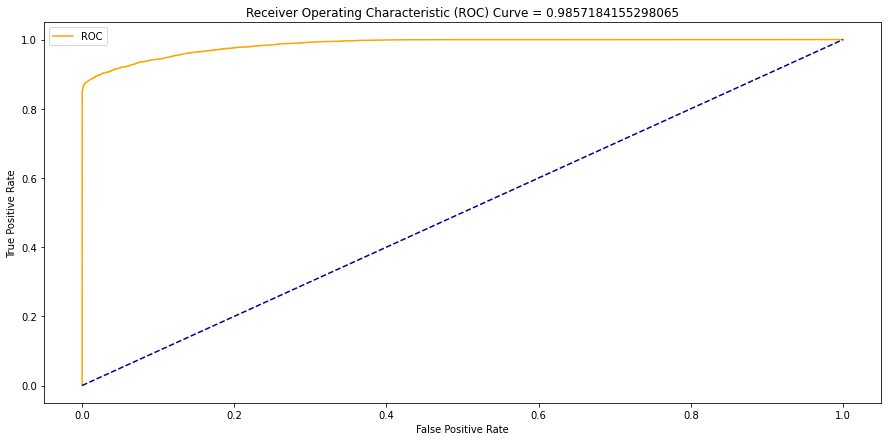

In [113]:
probs = lgbc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)

tmp4= pd.Series({'Model': " LightGradient Boosting ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                 })

model_lgbc1_report = models_report.append(tmp4, ignore_index = True)


print('Accuracy =' ,accuracy_score(y_test,y_test_pred))
print('Precision =' ,precision_score(y_test, y_test_pred, average='binary'))
print('Recall =' ,recall_score(y_test, y_test_pred, average='binary'))
print('F1 score =' ,f1_score(y_test, y_test_pred, zero_division=1)) 

plot_roc_cur(fper, tper)

In [114]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [115]:
## catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(X_train,y_train)

y_train_pred = cat.predict(X_train)
y_train_prob = cat.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = cat.predict(X_test)
y_test_prob = cat.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

Learning rate set to 0.063286
0:	learn: 0.6474064	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.6155536	total: 86.7ms	remaining: 43.3s
2:	learn: 0.5650465	total: 105ms	remaining: 35s
3:	learn: 0.5381177	total: 123ms	remaining: 30.7s
4:	learn: 0.5168281	total: 142ms	remaining: 28.3s
5:	learn: 0.5017974	total: 161ms	remaining: 26.7s
6:	learn: 0.4620906	total: 179ms	remaining: 25.4s
7:	learn: 0.4478994	total: 204ms	remaining: 25.3s
8:	learn: 0.4200485	total: 223ms	remaining: 24.5s
9:	learn: 0.3983630	total: 241ms	remaining: 23.8s
10:	learn: 0.3873306	total: 263ms	remaining: 23.7s
11:	learn: 0.3728697	total: 281ms	remaining: 23.1s
12:	learn: 0.3577782	total: 299ms	remaining: 22.7s
13:	learn: 0.3412633	total: 317ms	remaining: 22.4s
14:	learn: 0.3357223	total: 336ms	remaining: 22s
15:	learn: 0.3254459	total: 353ms	remaining: 21.7s
16:	learn: 0.3149606	total: 372ms	remaining: 21.5s
17:	learn: 0.3041191	total: 390ms	remaining: 21.3s
18:	learn: 0.2971435	total: 414ms	remaining: 21.4s
19:	learn: 0.

Accuracy = 0.9421619465496609
Precision = 0.981932499819325
Recall = 0.9011739736021755
F1 score = 0.939821539738535


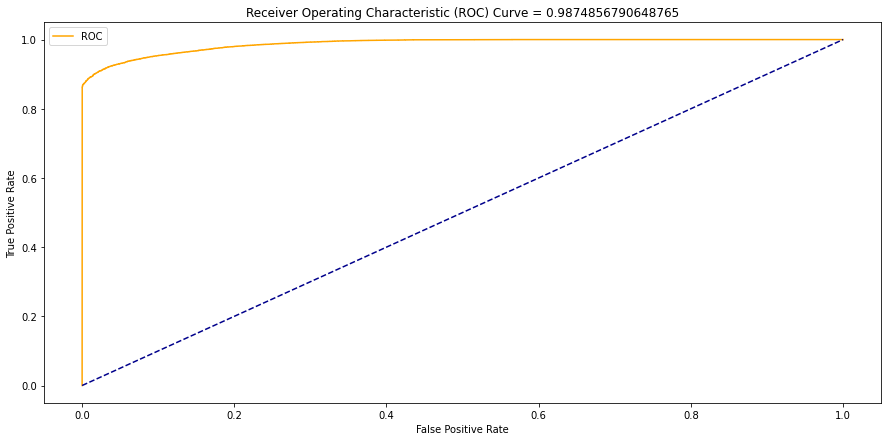

In [116]:
probs = cat.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)

tmp5= pd.Series({'Model': " CatBoosting ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                 })

model_cat1_report = models_report.append(tmp5, ignore_index = True)


print('Accuracy =' ,accuracy_score(y_test,y_test_pred))
print('Precision =' ,precision_score(y_test, y_test_pred, average='binary'))
print('Recall =' ,recall_score(y_test, y_test_pred, average='binary'))
print('F1 score =' ,f1_score(y_test, y_test_pred, zero_division=1)) 

plot_roc_cur(fper, tper)

In [117]:
##XGBoost.  etc_pred = etc.predict(x_test)

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_train_prob = xgb.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = xgb.predict(X_test)
y_test_prob = xgb.predict_proba(X_test)[:,1]

print('\n')
print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9201521454213916
0.9772333290811744


0.9189270043877144
0.976149687772113


Accuracy = 0.9189270043877144
Precision = 0.9884062451692688
Recall = 0.8481793460237448
F1 score = 0.9129394966981973


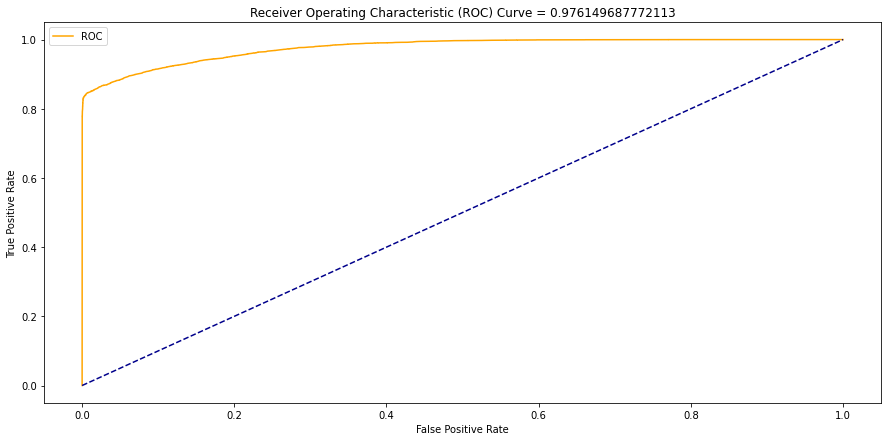

In [118]:
probs = xgb.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)

tmp6= pd.Series({'Model': " Xg Boosting ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                 })

model_xgb1_report = models_report.append(tmp6, ignore_index = True)
 

print('Accuracy =' ,accuracy_score(y_test,y_test_pred))
print('Precision =' ,precision_score(y_test, y_test_pred, average='binary'))
print('Recall =' ,recall_score(y_test, y_test_pred, average='binary'))
print('F1 score =' ,f1_score(y_test, y_test_pred, zero_division=1)) 

plot_roc_cur(fper, tper)

In [119]:
imp = pd.DataFrame(xgb.feature_importances_,index=X_new2.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
recruitment_channel,0.224338
0,0.147976
KPIs_met >80%,0.132343
avg_training_score,0.113490
1,0.110559
previous_year_rating,0.092332
3,0.092218
department,0.079986
age,0.006758


In [120]:

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
model_rf = pd.DataFrame(columns = cols)
model_rf = model_rf.append([model_lr1_report,model_rf1_report,model_dt1_report,model_lgbc1_report,model_cat1_report,model_xgb1_report], ignore_index = True)
model_rf  


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,logistic regression,0.728833,0.725361,0.742653,0.728926
1,Random Forest,0.897931,0.954552,0.835843,0.897786
2,Decision Tree,0.897931,0.954552,0.835843,0.897786
3,LightGradient Boosting,0.936603,0.989079,0.883001,0.936478
4,CatBoosting,0.942258,0.981932,0.901174,0.942162
5,Xg Boosting,0.919092,0.988406,0.848179,0.918927


In [121]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}
 
#submission = pd.DataFrame({'employee_id': submit,'is_promoted': rf_y_test_pred})

#submission.head()





In [122]:
# saving the submission file

#filename = 'submission.csv'
#submission.to_csv(filename, index = False)

#print("Saved File : ", filename)